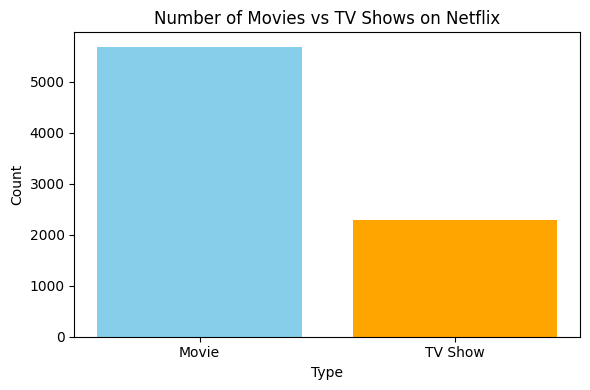

In [16]:
# s-1 import libraries
import pandas as pd
import matplotlib.pyplot as plt

#load the dataset
df = pd.read_csv('netflix_titles.csv')

# clean the data
df = df.dropna(subset=['type', 'release_year', 'rating', 'country', 'duration'])

type_counts = df['type'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(type_counts.index, type_counts.values, color=['skyblue', 'orange'])
plt.title('Number of Movies vs TV Shows on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('1-movies_vs_tvshows.png')
plt.show()

# Pie Chart of Content Ratings on Netflix

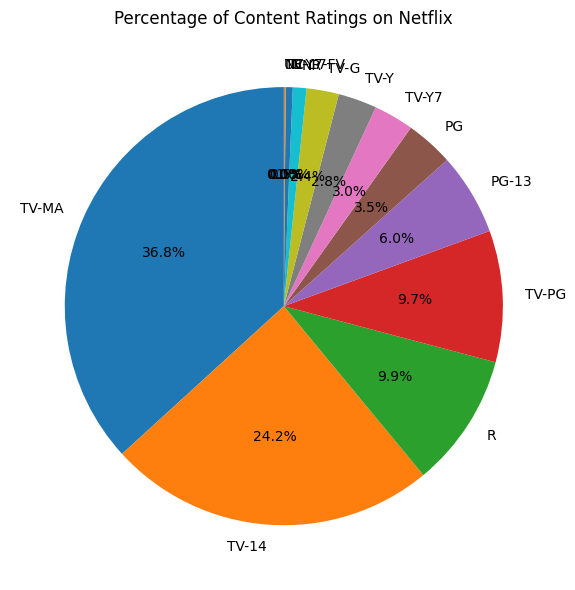

In [17]:
rating_counts = df['rating'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(rating_counts.values, labels=rating_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Content Ratings on Netflix')
plt.tight_layout()
plt.savefig('2-content_ratings_pie.png')
plt.show()

# Histogram of Distribution of Movie Durations on Netflix

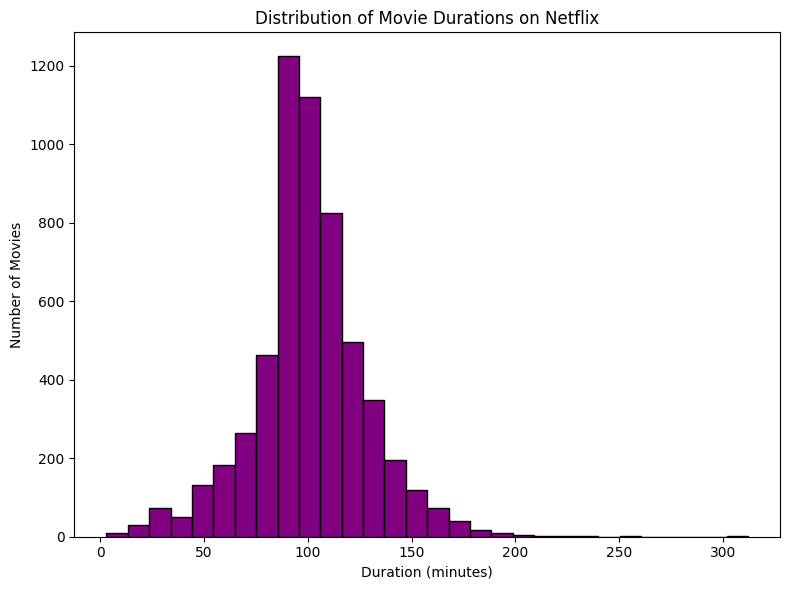

In [18]:
movie_df = df[df['type'] == 'Movie'].copy()
movie_df['duration_int'] = movie_df['duration'].str.replace(' min', '').astype(int)

plt.figure(figsize=(8, 6))
plt.hist(movie_df['duration_int'], bins=30, color='purple', edgecolor='black')
plt.title('Distribution of Movie Durations on Netflix')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.savefig('3-movie_durations_histogram.png')
plt.show()

# Scatter Diagram of Release Years VS Number of Shows

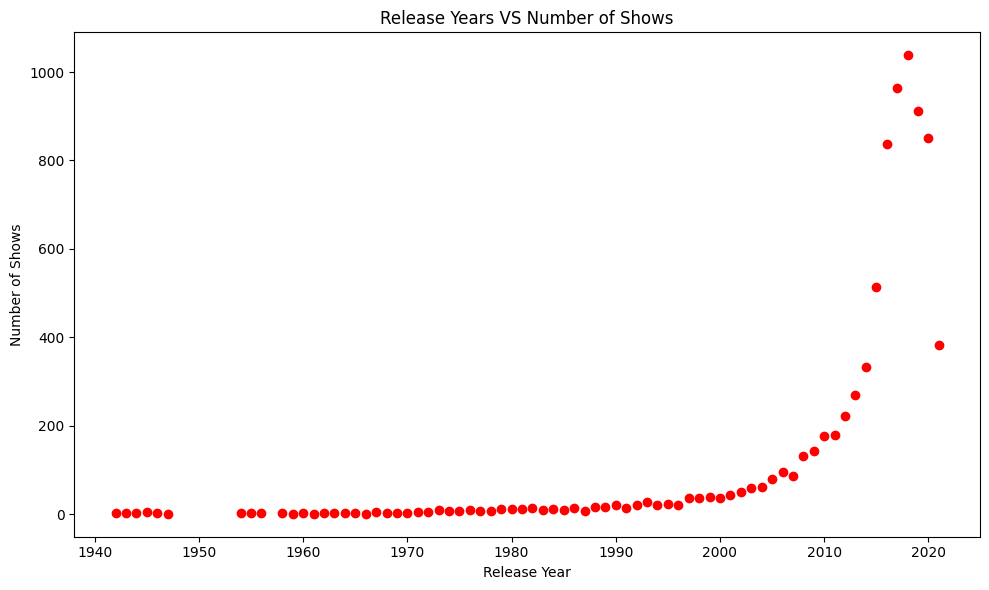

In [19]:
release_counts = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.scatter(release_counts.index, release_counts.values, color='red')
plt.title('Release Years VS Number of Shows')
plt.xlabel('Release Year')
plt.ylabel('Number of Shows')
plt.tight_layout()
plt.savefig('4-release_years_scatter.png')
plt.show()

# Bar chart of Top 10 Countries by Number of Netflix Shows

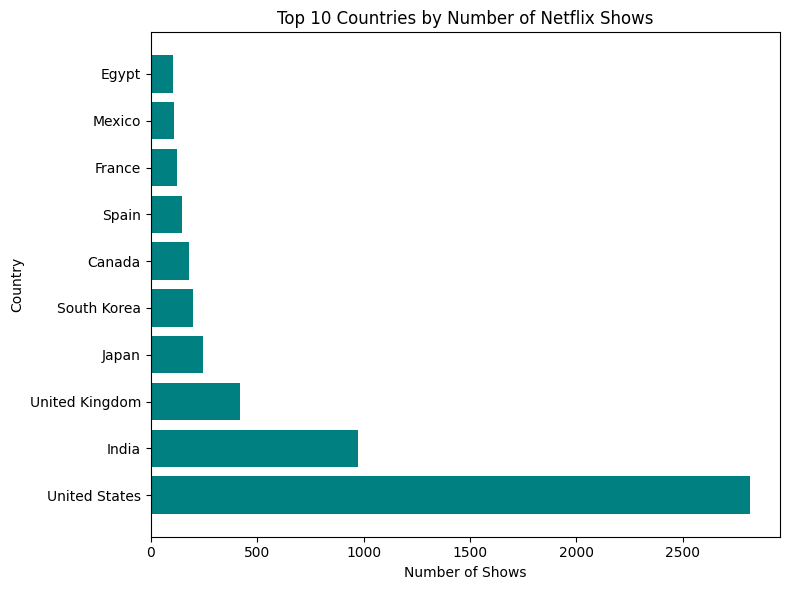

In [20]:
country_counts = df['country'].value_counts().head(10)
plt.figure(figsize=(8, 6))
plt.barh(country_counts.index, country_counts.values, color='teal')
plt.title('Top 10 Countries by Number of Netflix Shows')
plt.xlabel('Number of Shows')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig('5-top_countries_barh.png')
plt.show()


# SubPlots of Comparison of Movies and TV Shows Released Over the Years

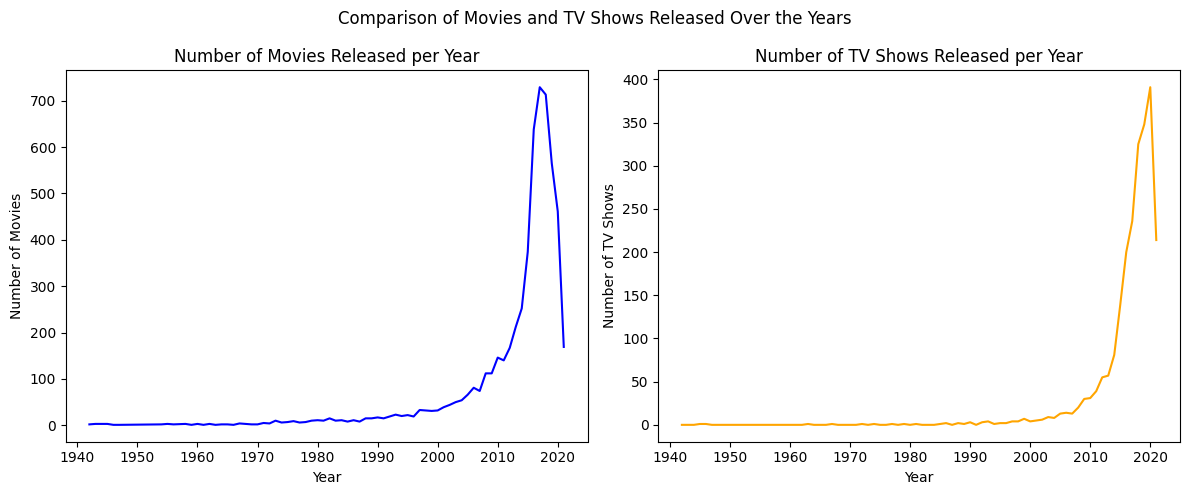

In [23]:
content_by_year = df.groupby(['release_year', 'type']).size().unstack().fillna(0)

fig, ax = plt.subplots(1,2,figsize=(12, 5))

# first subplot for Movies
ax[0].plot(content_by_year.index, content_by_year['Movie'], color='blue')
ax[0].set_title('Number of Movies Released per Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Movies')

# second subplot for TV Shows
ax[1].plot(content_by_year.index, content_by_year['TV Show'], color='orange')
ax[1].set_title('Number of TV Shows Released per Year')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Number of TV Shows')

fig.suptitle('Comparison of Movies and TV Shows Released Over the Years')
plt.tight_layout()

plt.savefig('6-movies_vs_tvshows_comparison.png')
plt.show()